# 🌿 Decision Trees on the IRIS Dataset

## 📌 Introduction
- The **Iris dataset** is a classic dataset used in machine learning and statistics. 
- It contains measurements of **sepal length, sepal width, petal length, and petal width** for three species of Iris flowers (**Setosa, Versicolor, and Virginica**).
- The goal is to build a **Decision Tree Classifier** to classify the species based on these features.


## 📊 Step 1: Importing Required Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

## 📥 Step 2: Loading the IRIS Dataset

In [2]:
# Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## 📊 Step 3: Exploratory Data Analysis (EDA)

In [3]:
# Summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 🏗️ Step 4: Splitting Data into Training and Testing Sets

In [4]:
# Splitting the dataset
# X = df.iloc[:, :-1]  # Features
# y = df.iloc[:, -1]   # Target
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

## 🌳 Step 5: Training a Decision Tree Classifier

In [8]:
# Train a Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 🎯 Step 6: Evaluating the Model

In [9]:
# Predictions
y_pred = clf.predict(X_test)

# Accuracy Score
print('Accuracy:', accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 📈 Step 7: Visualizing the Decision Tree

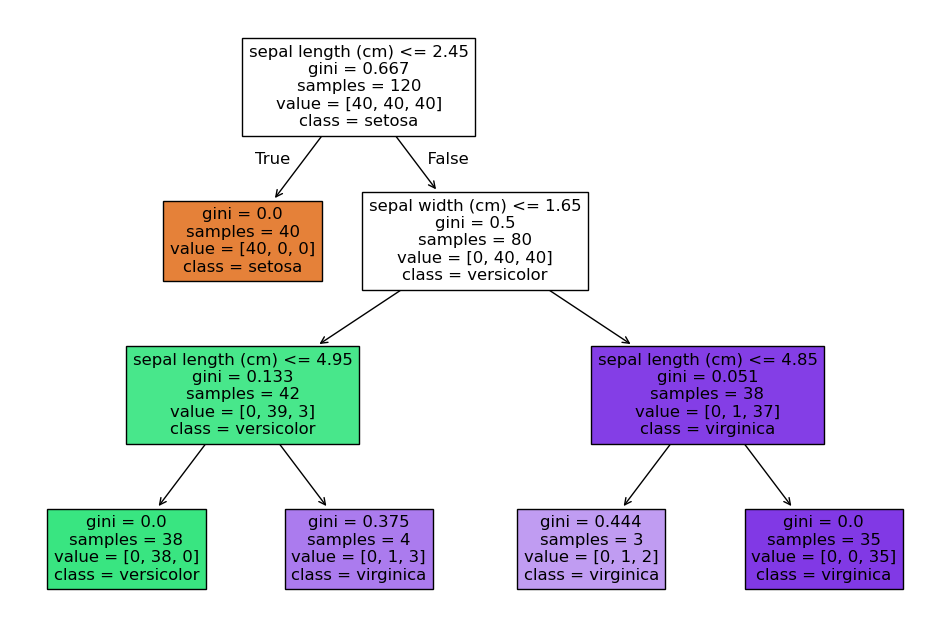

In [10]:
# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()